# Task 1:- TITANIC SURVIVAL PREDICTION

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Csv File
titanic = pd.read_csv('Titanic-Dataset.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#Getting first 5 Values
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DATA INSPECTION

In [5]:
#Getting some information about titanic_data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Cheching the number of missing Values in the dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Removing coloum Cabin 
titanic = titanic.drop(columns= 'Cabin' , axis = 1)

In [8]:
#Removing  all the missing Age values with the mean of all values in Age column
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [9]:
#Finding the most repeating values in Embarked coloum
print(titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [10]:
#Replacing the missing values from the 'Embarked' coloum with mode values i.e S
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace = True)

In [11]:
#Cheaking the missing values again
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# DATA ANALYSIS

In [12]:
#Getting some statistical mesures about titanic dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#Finding the number of people survived or not 
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# DATA VISUALISATION 

In [14]:
sns.set()

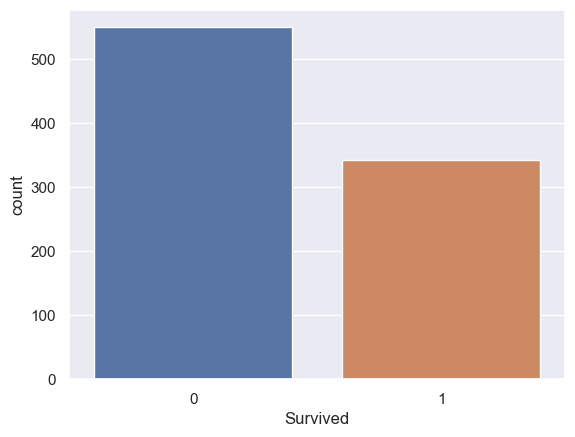

In [15]:
#Making a count plot for "Survived" coloum 
sns.countplot(x='Survived',data= titanic)
plt.show()

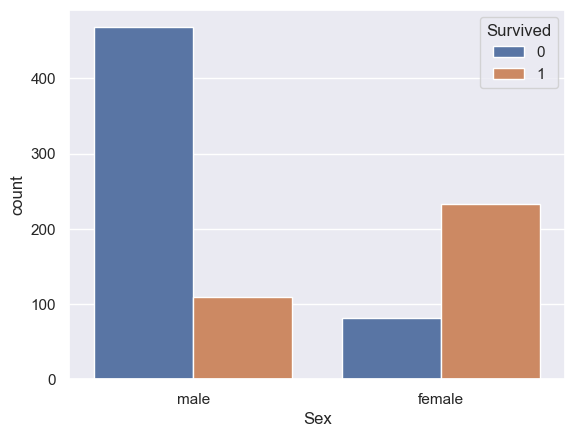

In [16]:
# we can see how many males and females are survived in titanic
sns.countplot (x='Sex', hue='Survived', data=titanic)
plt.show()

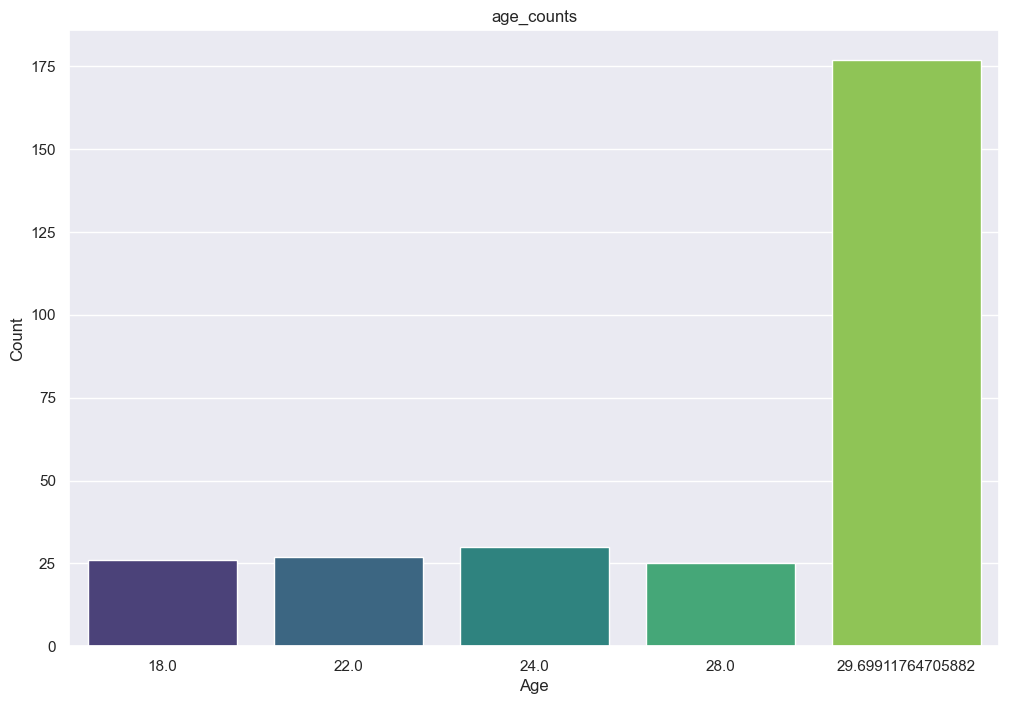

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
Name: count, dtype: int64

In [17]:
# most 5 age in data
age_counts=titanic['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
age_counts

In [18]:
pclass_counts=titanic['Pclass'].value_counts()
pclass_counts


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

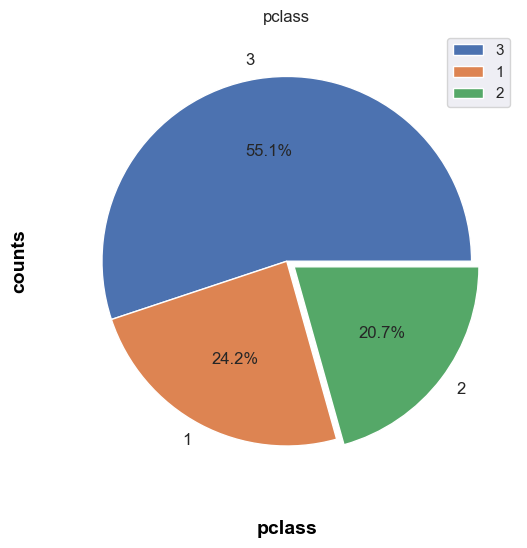

In [19]:
#Making a count plot "Pclass" coloum 
plt.figure(figsize = (20,6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie',fontsize = 12,explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass',weight = "bold",color = "#000000",fontsize = 14 , labelpad = 20)
plt.ylabel('counts',weight = 'bold',color = "#000000",fontsize = 14 , labelpad = 20)
plt.legend(labels = pclass_counts.index , loc = 'best')
plt.show()

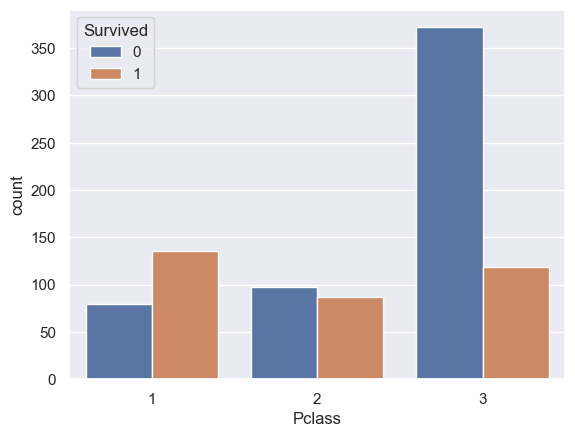

In [20]:
#Making  visualisation for Pclass who survived more
sns.countplot(x='Pclass', hue="Survived",data = titanic)
plt.show()

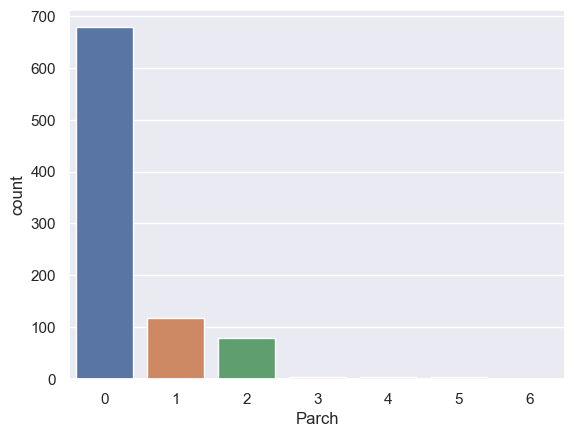

In [21]:
#Making a count plot for 'Parch' coloum 
sns.countplot(x = "Parch",data = titanic)
plt.show()

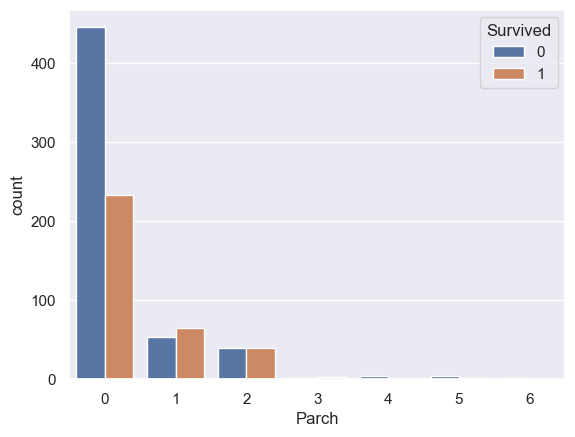

In [22]:
#We can see how Parents and Childrens are survived in titanic
sns.countplot(x = "Parch", hue = 'Survived',data = titanic)
plt.show()

In [23]:
Embarked_counts = titanic['Embarked'].value_counts()
Embarked_counts

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

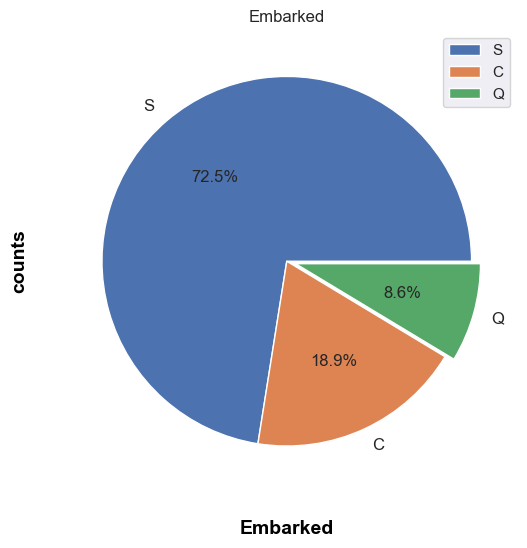

In [24]:
#Visualisationfor "Embarked coloum
plt.figure(figsize=(20, 6))
explode =(0,0,0.05)
Embarked_counts.plot(kind = 'pie',fontsize=12, explode=explode, autopct='%.1f%%')
plt.title("Embarked") 
plt.xlabel("Embarked", weight ="bold", color = "#000000", fontsize=14, labelpad=20)
plt.ylabel("counts", weight="bold", color="#000000", fontsize=14, labelpad=20) 
plt. legend(labels =  Embarked_counts.index, loc="best")
plt.show()

# ENCODING CATEGORICAL COLOUMN

In [25]:
titanic["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [26]:
titanic["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [27]:
#converting categoical coloumns
titanic.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# SEPREATING FEATURES AND TARGET VALUES

In [29]:
X= titanic.drop(columns = ['PassengerId', 'Name' , 'Survived' , 'Ticket'] , axis = 1)
Y= titanic['Survived']

In [31]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(y)

# Splitting the data into trainind data and testing data

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
print(X.shape , X_train.shape , X_test.shape)

# MODEL TRAINING

In [ ]:
model = LogisticRegression()

In [ ]:
#TRAINING THE LOGISTIC REGRESSION MODEL WITH TRAINING DATA
model.fit(X_train , Y_train)

# MODEL EVALUATION

FOR TRAINING DATA

In [ ]:
#ACCURACY ON THE TRAINING DATA
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

In [ ]:
training_data_accuracy = accuracy_score(Y_train , X_train_prediction)
print('Accuracy Score of Training Data :',training_data_accuracy)

For Testing Data

In [ ]:
#Accuracy on the test data
X_test_prediction = model.predict(X_test)

In [ ]:
print(X_test_prediction)

In [ ]:
testing_data_accuracy = accuracy_score(Y_test , X_test_prediction)
print('Accuracy Score of Testing Data :',testing_data_accuracy)

Conclusion:
Here the test and train accuracy is approxmately same,so we can conclude that we are able to predict 'Survival of people on Titanic'